# Guía 3: Teoría de detección de señales (parte 2)

## Toma de decisiones 2020

---

# Ejercicio 1

Un participante de un experimento de detección tiene d 0 = 1.5. En el experimento se presentan en igual
cantidad “ruido” y “ruido+señal”.

Calcular el porcentaje de respuestas correctas (Pc) para 100 criterios diferentes, desde μ n − 3σ n hasta μ s + 3σ s , donde (μ n , σ n ) y (μ s ,σ s ) son los parámetros de las distribuciones de ruido y señal respectivamente.


A- Graficar ***Pc vs. Criterio***.

In [32]:
dp <- 1.5

In [33]:
muN <- 0
muS <- muN + dp

sigma <- 1

In [34]:
ntrialsS <- 5000
ntrialsN <- 5000

# La información de qué estímulo corresponde a cada trial la vamos a guardar en la
# variable Label:
# señal+ruido ---> 1
# ruido ---> 0
# Crear un vector de Labels para cada tipo de estímulo. El largo de cada vector debe ser
# ntrialsS y ntrialsN
signalLabels <- rep(1, ntrialsS)
noiseLabels  <- rep(0, ntrialsN)

# Tomar las muestras de cada distribución.
signalSamples <- rnorm(ntrialsS, mean=muS, sd=sigma)
noiseSamples  <- rnorm(ntrialsN, mean=muN, sd=sigma)

# Poner todas las muestras juntas, primero las de'señal+ruido', luego las de'ruido'
allSamples <- append(signalSamples, noiseSamples)

# Hacer lo mismo con los vectores de Labels
allLabels <- append(signalLabels, noiseLabels)

In [35]:
criterio <- seq(muN-3*sigma, muS+3*sigma, length.out = 100)


Pc <- rep(NA, length(criterio))

for (i in 1:length(criterio)){
    decision <- as.integer(allSamples > criterio[i])

    isCorrect <- decision == allLabels
    
    #percentCorrect <- mean(isCorrect)

    hits  <- mean(isCorrect == 1 & decision == 1) # tasa de hits
    cr    <- mean(isCorrect == 1 & decision == 0) # tasa de rechazos correctos
    Pc[i] <- hits + cr # % de respuestas correctas
}



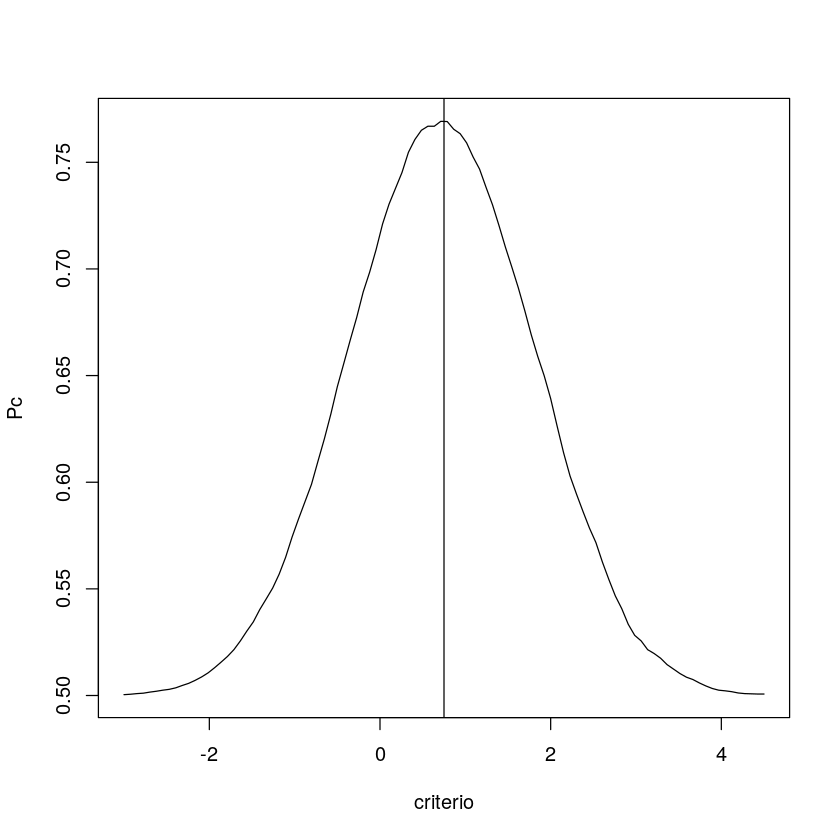

In [36]:
plot(criterio, Pc, type='l')
abline(v=dp/2)

## B.

B- ¿En qué lugar del script anterior se usó que el experimentador presentó los dos tipos de estímulos con la
misma probabilidad?

> Se utilizó al elegir el mismo tamaño de muestra para ambas distribuciones: La distribución de ruido, y la distribución de señal+ruido.

## C.

C- Crear una función que tome como inputs los parámetros de las distribuciones (μ s , μ n , σ), la proporción
de estímulos “ruido” y “señal+ruido” que se van a presentar y un vector de criterios a evaluar. La salida de
la función debe ser un vector con el porcentaje de respuestas correctas para cada criterio evaluado.

In [37]:
respuestas_correctas <- function(muS, muN, sigma, criterios, prop=0.5){
    # prop=0.2: 20% ruido, 80% señal
    ntrialsN <- 10000*prop
    ntrialsS <- 10000*(1-prop)

    # La información de qué estímulo corresponde a cada trial la vamos a guardar en la
    # variable Label:
    # señal+ruido ---> 1
    # ruido ---> 0
    # Crear un vector de Labels para cada tipo de estímulo. El largo de cada vector debe ser
    # ntrialsS y ntrialsN
    signalLabels <- rep(1, ntrialsS)
    noiseLabels  <- rep(0, ntrialsN)

    # Tomar las muestras de cada distribución.
    signalSamples <- rnorm(ntrialsS, mean=muS, sd=sigma)
    noiseSamples  <- rnorm(ntrialsN, mean=muN, sd=sigma)

    # Poner todas las muestras juntas, primero las de'señal+ruido', luego las de'ruido'
    allSamples <- append(signalSamples, noiseSamples)

    # Hacer lo mismo con los vectores de Labels
    allLabels <- append(signalLabels, noiseLabels)
    
    
    #criterio <- seq(muN-3*sigma, muS+3*sigma, length.out = 100)

    Pc <- rep(NA, length(criterios))

    for (i in 1:length(criterios)){
        decision <- as.integer(allSamples > criterios[i])

        isCorrect <- decision == allLabels

        #percentCorrect <- mean(isCorrect)

        hits  <- sum(isCorrect == 1 & decision == 1) # tasa de hits
        cr    <- sum(isCorrect == 1 & decision == 0) # tasa de rechazos correctos
        Pc[i] <- (hits + cr)/(ntrialsS+ntrialsN) # % de respuestas correctas
    }
    return (Pc)
}

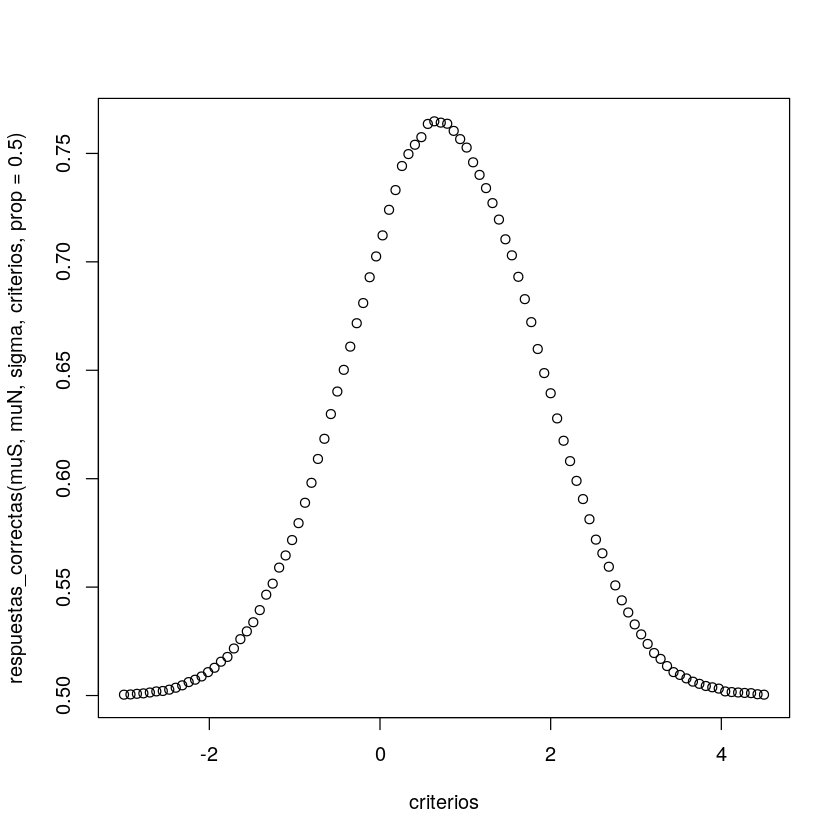

In [38]:
criterios <-seq(muN-3*sigma, muS+3*sigma, length.out = 100)
plot(criterios, respuestas_correctas(muS, muN, sigma, criterios, prop=0.5))

# Ejercicio 2

En un experimento de detección, un participante realiza 1000 trials, 400 con ruido y 600 con señal.

Las respuestas se muestran en la siguiente tabla:

| _ |**no**|**si**|**total**|
|--|--|--|--|
|**ruido**|327|73|400|
|**señal**|104|496|600|

In [39]:
library(lestat)

In [40]:
fun_basicsdt <- function(h, f){
  zh <- invcdf(normal(), h)
  zf <- invcdf(normal(), f)
  
  dprim <- zh - zf
  c <- -0.5 * (zh + zf)
  return(c(dprim, c))
}

In [41]:
dpc <- fun_basicsdt(h=496/600, f=73/400)
dp <- dpc[1]
c  <- dpc[2]
dp
c

[1] 1.846953

[1] -0.01759786

In [42]:
dp/2+c

[1] 0.9058788

In [43]:
logbeta <- dp * c
logbeta

[1] -0.03250242

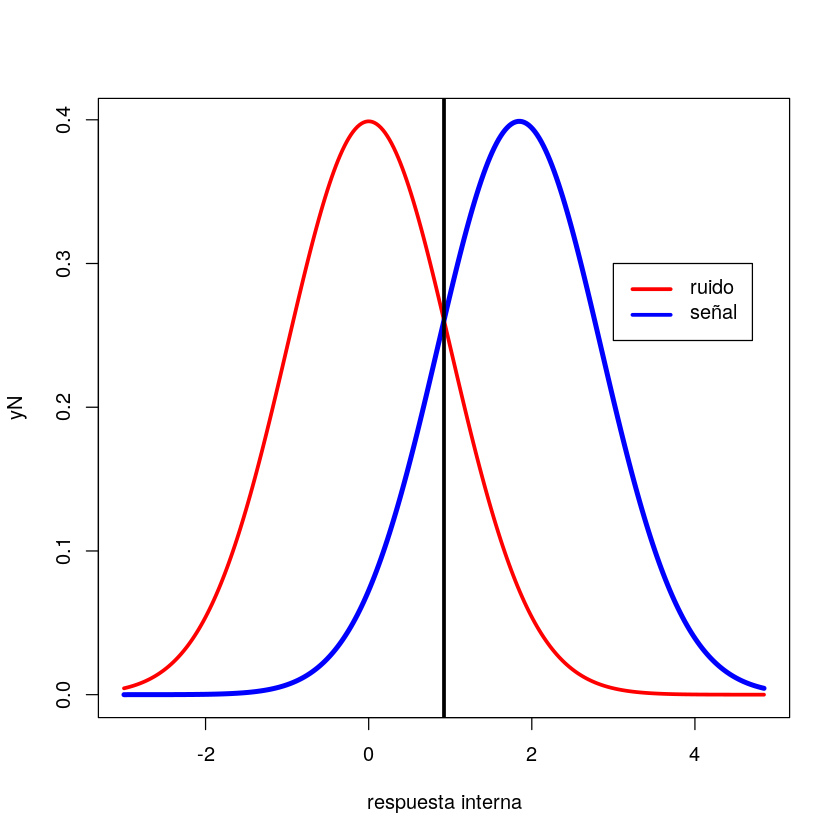

In [44]:
muN <- 0
muS <- muN + dp

sigma <- 1
criterio <- dp/2

x <- seq(from = muN-3, to = muS+3, len = 300)
yN <- dnorm(x, muN, sigma)
yS <- dnorm(x, muS, sigma)

plot(x, yN, type = "l", lwd = 3, col="red", xlab = "respuesta interna")
lines(x, yS, lwd = 4, col="blue")

abline(v=criterio, lwd=3)
legend(+3, 0.3, legend = c('ruido','señal'), col = c("red", "blue"), lty = 1,lwd = 3)

## C.
C- Calcular el criterio, λ opt , con el que se obtendría un máximo porcentaje de respuestas correctas usando la función que crearon en el ejercicio 1C.

Con el valor de criterio obtenido, calcular c y log(β) ¿A qué distancia está el criterio del participante del criterio ideal?

Recordar que c es el criterio medido desde (μ n + μ s )/2 y que β = f s (λ)/f n (λ)


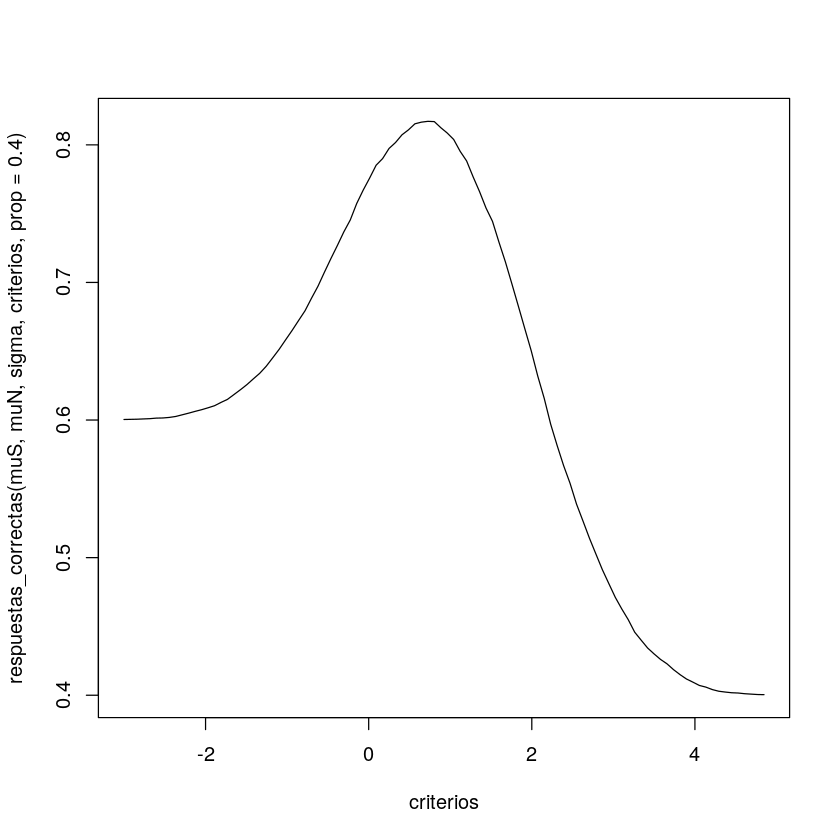

In [45]:
criterios <-seq(muN-3*sigma, muS+3*sigma, length.out = 100)
Pc <- respuestas_correctas(muS,muN, sigma, criterios, prop=0.4)
plot(criterios, respuestas_correctas(muS, muN, sigma, criterios, prop=0.4), type='l')

## D.
D- Comparar los valores de $c$ y $log(\beta)$ obtenidos en C con los que se obtienen con la expresión exacta
$beta_{opt} = \frac{P(n)}{P(s)}$, donde ${P(n)},{P(s)}$ son las probabilidades de presentación de ruido y señal respectivamente.

Puede usar también que $log(\beta) = c \ d' $.

In [46]:
lamb.opt <- criterios[which.max(Pc)]
lamb.opt

[1] 0.6460591

In [47]:
# lambda = dp/2 + c
c.opt <- lamb.opt - dp/2
c.opt

[1] -0.2774175

In [48]:
logbeta <- c.opt * dp
logbeta

[1] -0.5123773

In [49]:
beta <- 0.4/0.6
log(beta)

[1] -0.4054651

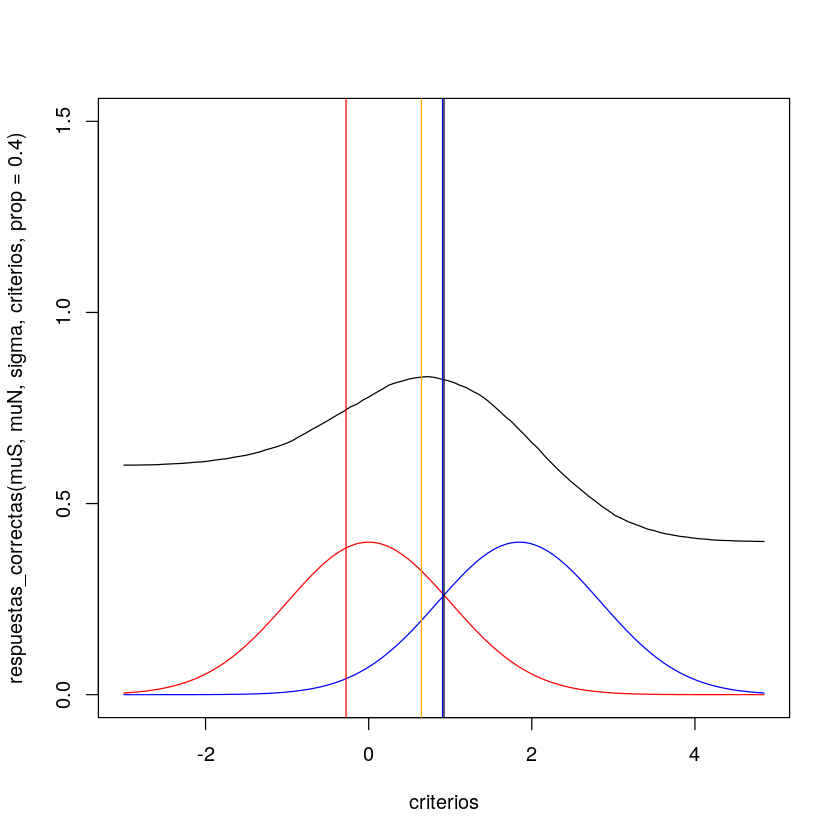

In [50]:
criterios <-seq(muN-3*sigma, muS+3*sigma, length.out = 100)
Pc <- respuestas_correctas(muS,muN, sigma, criterios, prop=0.4)
plot(criterios, respuestas_correctas(muS, muN, sigma, criterios, prop=0.4), type='l', ylim=c(0,1.5))
lines(x, yN, type = "l", lwd = 1, col="red", xlab = "respuesta interna")
lines(x, yS, lwd = 1, col="blue")
#abline(v=log(beta), col='green')
abline(v=lamb.opt, col='orange')
abline(v=c.opt, col='red')
abline(v=dp/2+c, col='blue')
abline(v=dp/2, col='black')

## Ejercicio 3

Considerar la tarea de un observador que espera detectar un evento poco frecuente, que sucede sólo en el 1%
de los trials. El evento, por si mismo, es detectable con relativamente alta sensibilidad, $d' = 2$.

A- Calcular el criterio de decisión que debería tener el obserador si quiere minimizar los errores de acuerdo al
modelo de detección de señales de igual varianza. Hacer un gráfico (a mano) de las distribuciones y el criterio
correspondiente.

B- Usando el criterio calculado en A, calcular qué fracción de los eventos se pierde de detectar.

C- Para inducir a un menor número de omisiones, se decide recompensar al observador con $\$50$ con cada hit
y $\$1$ por cada rechazo correcto.

¿Cómo se modificaría el porcentaje de omisiones si el observador ajusta su criterio para maximizar su ganancia?

¿Cómo afecta este cambio a la tasa de falsas alarmas? Ayuda: Recordar que el criterio óptimo corresponde a un valor de β tal que:

$$\beta (opt) = \frac{P(n)}{P(s)} \times \frac{V(r.c.) + K(f.a.)}{V(hit) + K(miss)}$$

donde V es el valor correspondiente a los rechazos correctos (r.c.) y hits, y K el costo de los errores.

## A.

In [1]:
prop <- 0.01

In [2]:
dp = 2
muS = 2
muN = 0
sigma = 1
P_s = 0.01
P_n = 0.99
beta = P_n / P_s
c = log(beta) / dp

In [3]:
beta
c

[1] 99

[1] 2.29756

In [4]:
lambda.opt <- dp / 2 + c
lambda.opt

[1] 3.29756

## B.

In [65]:
#b)
1-respuestas_correctas(muS, muN, sigma, c(lambda.opt), prop)

[1] 0.8985

## C.

In [66]:
#c)
respuestas_correctas_2 <- function(muS, muN, sigma, criterios, prop=0.5){
    # prop=0.2: 20% ruido, 80% señal
    ntrialsN <- 10000*prop
    ntrialsS <- 10000*(1-prop)

    # La información de qué estímulo corresponde a cada trial la vamos a guardar en la
    # variable Label:
    # señal+ruido ---> 1
    # ruido ---> 0
    # Crear un vector de Labels para cada tipo de estímulo. El largo de cada vector debe ser
    # ntrialsS y ntrialsN
    signalLabels <- rep(1, ntrialsS)
    noiseLabels  <- rep(0, ntrialsN)

    # Tomar las muestras de cada distribución.
    signalSamples <- rnorm(ntrialsS, mean=muS, sd=sigma)
    noiseSamples  <- rnorm(ntrialsN, mean=muN, sd=sigma)

    # Poner todas las muestras juntas, primero las de'señal+ruido', luego las de'ruido'
    allSamples <- append(signalSamples, noiseSamples)

    # Hacer lo mismo con los vectores de Labels
    allLabels <- append(signalLabels, noiseLabels)
    
    
    #criterio <- seq(muN-3*sigma, muS+3*sigma, length.out = 100)

    Pc <- rep(NA, length(criterios))

    for (i in 1:length(criterios)){
        decision <- as.integer(allSamples > criterios[i])

        isCorrect <- decision == allLabels

        #percentCorrect <- mean(isCorrect)

        hits  <- sum(isCorrect == 1 & decision == 1) # tasa de hits
        cr    <- sum(isCorrect == 1 & decision == 0) # tasa de rechazos correctos
        Pc[i] <- (hits + cr)/(ntrialsS+ntrialsN) # % de respuestas correctas
    }
    return (c(hits, cr, ntrialsN, ntrialsS))
}


In [69]:
resultados <- respuestas_correctas_2(muS, muN, sigma, c(lambda.opt), prop)
hits <- resultados[0]
cr   <- resultados[1]
ntrialsN <- resultados[2]
ntrialsS <- resultados[3]

V_rc  <- 1
V_hit <- 50
K_fa  <- 0
K_miss <- 0

nuevo.beta.opt <- P_n/P_s * (V_rc + K_fa)/(V_hit + K_miss)
nuevo.beta.opt

[1] 1.98

In [73]:
c <- log(nuevo.beta.opt) / dprima
nuevo.lambda.opt <- dp / 2 + c
nuevo.lambda.opt

[1] 1.341548

In [75]:
1-respuestas_correctas(muS, muN, sigma, c(nuevo.lambda.opt), prop)

[1] 0.2533

# Ejercicio 4

In [76]:
dp <- 1.5

In [77]:
muN <- 0
muS <- muN + dp

sigma <- 1

In [127]:

# prop=0.2: 20% ruido, 80% señal
ntrialsN <- 10000*0.5
ntrialsS <- 10000*0.5

# La información de qué estímulo corresponde a cada trial la vamos a guardar en la
# variable Label:
# señal+ruido ---> 1
# ruido ---> 0
# Crear un vector de Labels para cada tipo de estímulo. El largo de cada vector debe ser
# ntrialsS y ntrialsN
signalLabels <- rep(1, ntrialsS)
noiseLabels  <- rep(0, ntrialsN)

# Tomar las muestras de cada distribución.
signalSamples <- rnorm(ntrialsS, mean=muS, sd=sigma)
noiseSamples  <- rnorm(ntrialsN, mean=muN, sd=sigma)

# Poner todas las muestras juntas, primero las de'señal+ruido', luego las de'ruido'
allSamples <- append(signalSamples, noiseSamples)

# Hacer lo mismo con los vectores de Labels
allLabels <- append(signalLabels, noiseLabels)

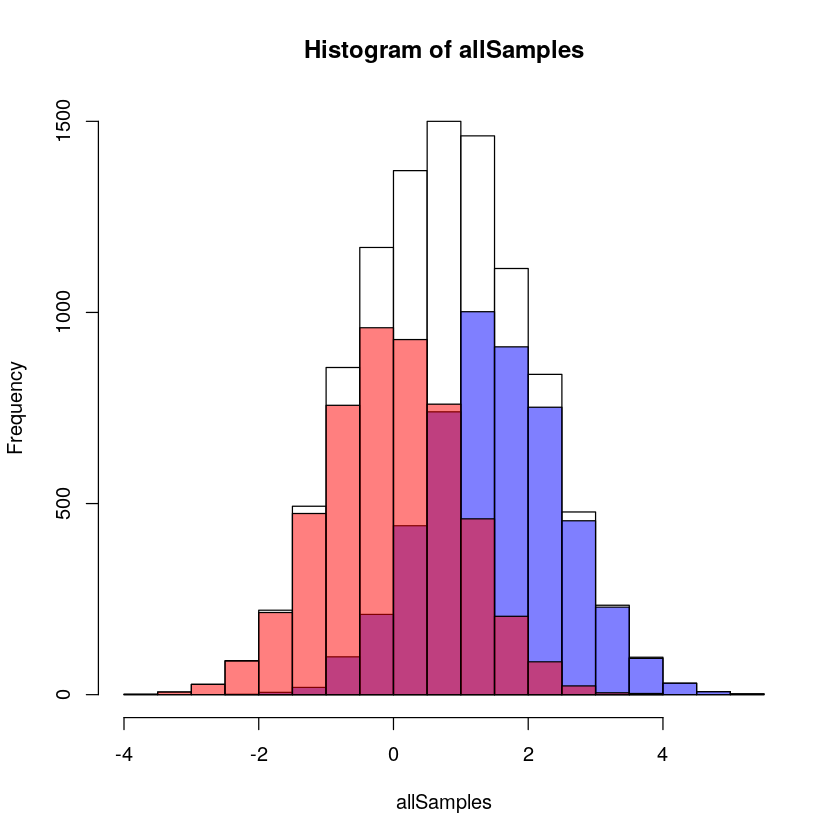

In [128]:
hist(allSamples, col=rgb(1,1,1, 0.5))
hist(signalSamples, add=T, col=rgb(0,0,1, 0.5))
hist(noiseSamples, add=T, col=rgb(1,0,0, 0.5))

In [129]:
#b
criterios <- c(-0.5, 0.2, dp/2 ,1.7, 2.5)

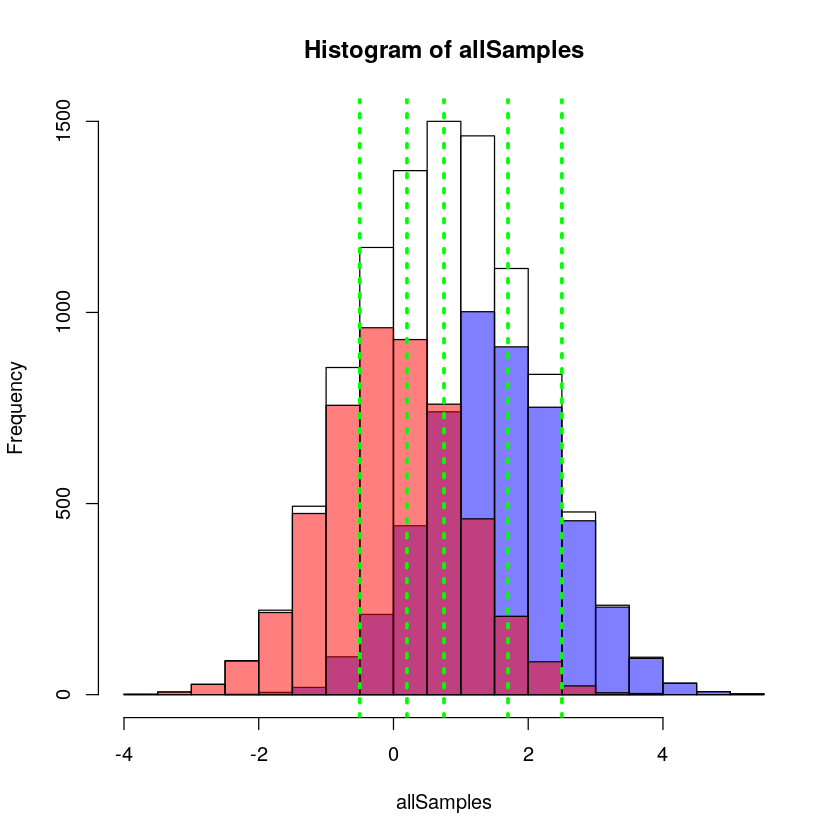

In [157]:
hist(allSamples, col=rgb(1,1,1, 0.5))
hist(signalSamples, add=T, col=rgb(0,0,1, 0.5))
hist(noiseSamples, add=T, col=rgb(1,0,0, 0.5))
abline(v=criterios, col='green', lwd=3, lty=3)

## C.

In [158]:
#C)
decisiones <- data.frame(no.alta=rep(0,2),
                         no.media=rep(0,2),
                         no.baja=rep(0,2),
                         si.baja=rep(0,2),
                         si.media=rep(0,2),
                         si.alta=rep(0,2))
rownames(decisiones) <- c('ruido','señal') 
decisiones

,no.alta,no.media,no.baja,si.baja,si.media,si.alta
ruido,0,0,0,0,0,0
señal,0,0,0,0,0,0


In [159]:
sum(as.integer(allSamples < criterios[1]))

[1] 1694

In [160]:
decisiones['ruido', 0]

ruido


In [161]:
decisiones['ruido', 1] <- sum(noiseSamples < criterios[1])
decisiones['señal', 1] <- sum(signalSamples < criterios[1])

decisiones['ruido', 2] <- sum(noiseSamples  > criterios[1] & noiseSamples  < criterios[2])
decisiones['señal', 2] <- sum(signalSamples > criterios[1] & signalSamples < criterios[2])

decisiones['ruido', 3] <- sum(noiseSamples  > criterios[2] & noiseSamples  < criterios[3])
decisiones['señal', 3] <- sum(signalSamples > criterios[2] & signalSamples < criterios[3])

decisiones['ruido', 4] <- sum(noiseSamples  > criterios[3] & noiseSamples  < criterios[4])
decisiones['señal', 4] <- sum(signalSamples > criterios[3] & signalSamples < criterios[4])

decisiones['ruido', 5] <- sum(noiseSamples  > criterios[4] & noiseSamples  < criterios[5])
decisiones['señal', 5] <- sum(signalSamples > criterios[4] & signalSamples < criterios[5])

decisiones['ruido', 6] <- sum(noiseSamples  > criterios[5])
decisiones['señal', 6] <- sum(signalSamples > criterios[5])

decisiones

sum(decisiones['ruido',])
sum(decisiones['señal',])

,no.alta,no.media,no.baja,si.baja,si.media,si.alta
ruido,1569,1338,964,909,189,31
señal,125,346,643,1789,1278,819


[1] 5000

[1] 5000

In [181]:
tasas <- decisiones/5000
rownames(tasas) <- c('fa', 'hit')
tasas

,no.alta,no.media,no.baja,si.baja,si.media,si.alta
fa,0.3138,0.2676,0.1928,0.1818,0.0378,0.0062
hit,0.0250,0.0692,0.1286,0.3578,0.2556,0.1638


In [184]:
ROC.n <- rep(NA, 6)
ROC.s <- rep(NA, 6)

for(i in 6:1){
    ROC.n[i] <- sum(tasas['fa', 6:i])
    ROC.s[i] <- sum(tasas['hit', 6:i])
}

ROC.n
ROC.s


[1] 1.0000 0.6862 0.4186 0.2258 0.0440 0.0062

[1] 1.0000 0.9750 0.9058 0.7772 0.4194 0.1638

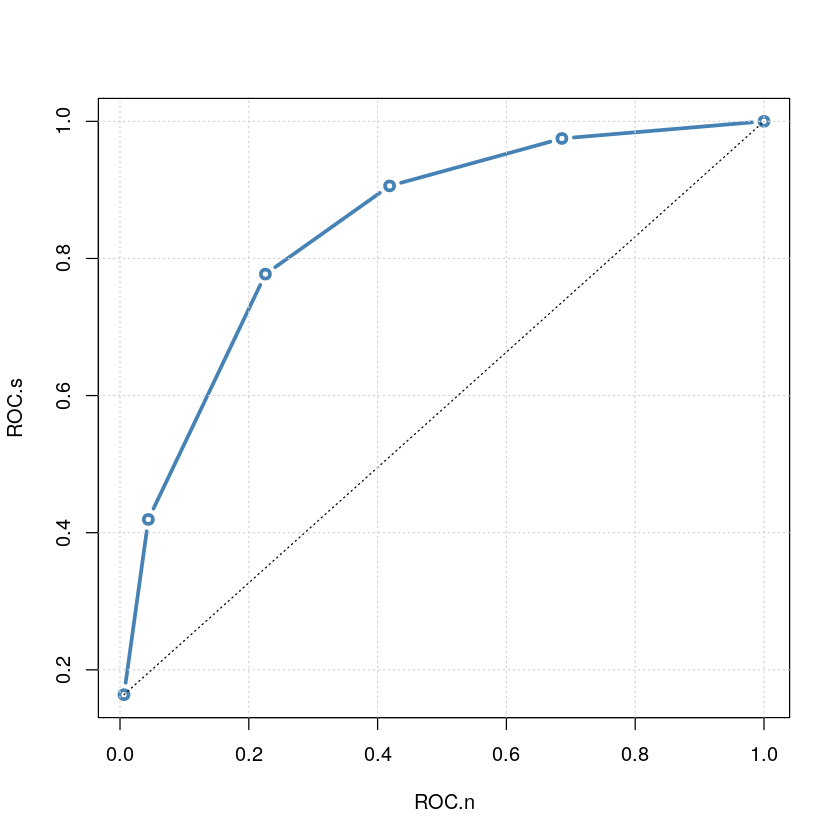

In [186]:
plot(ROC.n, ROC.s, type='b', lwd=3, col='steelblue')
lines(c(ROC.n[6], ROC.n[1]), c(ROC.s[6], ROC.s[1]), lty=3)
grid()

# Ejercicio 5

En un experimento de detección cada participante realiza una serie de trials en 6 condiciones diferentes.

En todas las condiciones, la intensidad y duración del estímulo se mantuvo constante por lo que no se espera que d' varíe entre condiciones.

Cada condición se hizo con incentivos diferentes para que cambie el criterio de decisión en cada una de ellas. 
Los resultados fueron los siguientes:

s=ruido, r=si s=ruido, r=no s=señal, r=si s=señal, r=no

* condición A 264 36 294 6
* condición B 168 132 273 27
* condición C 102 198 252 48
* condición D 30 270 198 102
* condición E 17 283 171 129
* condición F 2 298 108 192

3

A- Calcular d' para cada condición por separado. ¿Qué le resulta poco satisfactorio de este análisis?

B- Graficar la curva ROC en coordenadas z, es decir z(hits) vs. z(f.a.).

Superponer una recta de pendiente 1.

C- Calcular la pendiente de z(hits) vs. z(f.a.) con la función lm de R. Estimar σs, de la distribución de
respuestas internas correspondiente a la “señal”, (si la correspondiente a ruido es σn = 1).

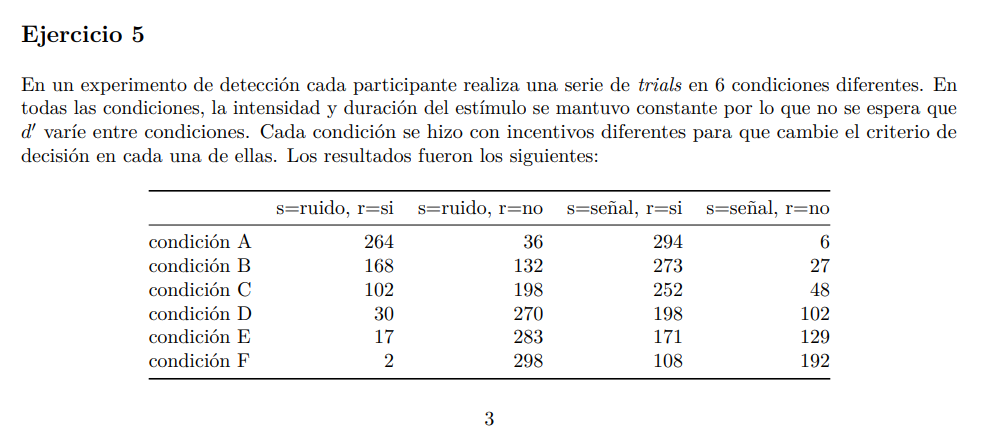

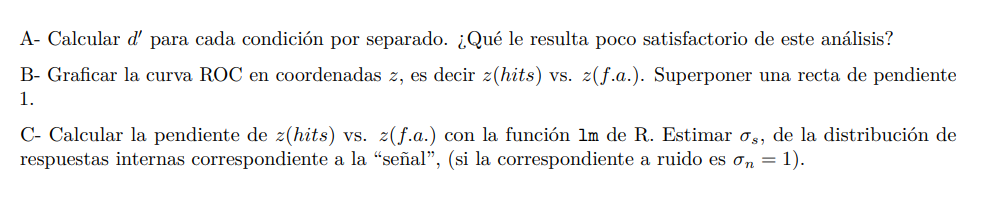

In [2]:
nCond <- 6
resultados <- data.frame(S0R1=rep(NA, nCond), S0R0=rep(NA, nCond), S1R1=rep(NA, nCond), S1R0=rep(NA, nCond))
rownames(resultados) <- c('condA','condB','condC','condD','condE','condF')

In [3]:
resultados['condA',] <- c(264, 36,  294, 6)
resultados['condB',] <- c(168, 132, 273, 27)
resultados['condC',] <- c(102, 198, 252, 48)
resultados['condD',] <- c(30,  270, 198, 102)
resultados['condE',] <- c(17,  283, 171, 129)
resultados['condF',] <- c(2,   298, 108, 192)

In [123]:
resultados

,S0R1,S0R0,S1R1,S1R0
condA,264,36,294,6
condB,168,132,273,27
condC,102,198,252,48
condD,30,270,198,102
condE,17,283,171,129
condF,2,298,108,192


In [124]:
library(lestat)

In [125]:
fun_basicsdt <- function(h, f){
  zh <- invcdf(normal(), h)
  zf <- invcdf(normal(), f)
  
  dprim <- zh - zf
  c <- -0.5 * (zh + zf)
  return(c(dprim, c))
}

In [126]:
dps <- rep(NA, 6)
cs  <- rep(NA, 6)
for(cond in 1:nrow(resultados)){
    total <- sum(resultados[cond, ])
    h <- resultados[cond, 'S1R1']/total
    f <- resultados[cond, 'S0R1']/total
    dpc <- fun_basicsdt(h,f)
    dps[cond] <- dpc[1]
    cs[cond]  <- dpc[2]
}

In [127]:
dps
cs

[1] 0.1259003 0.4698030 0.7522718 1.2049405 1.3378216 1.7976868

[1] 0.08801906 0.34794002 0.57802937 1.04238340 1.23696232 1.81420849

In [128]:
#plot(dps)
#plot(cs)

In [133]:
#b
ROC.n <- rep(NA, 6)
ROC.s <- rep(NA, 6)
nRes <- nrow(resultados)

for(cond in nRes:1){
    totalS0 <- sum(resultados[, c('S0R1','S0R0')])
    totalS1 <- sum(resultados[, c('S1R1','S1R0')])
    #ROC.n[i] <- sum(tasas['fa', 6:i])
    ROC.n[nRes-cond+1] <- sum(resultados[nRes:cond, 'S0R1']) / totalS0
    #ROC.s[i] <- sum(tasas['hit', 6:i])
    ROC.s[nRes-cond+1] <- sum(resultados[nRes:cond, 'S1R1']) / totalS1
}

ROC.n
ROC.s

[1] 0.001111111 0.010555556 0.027222222 0.083888889 0.177222222 0.323888889

[1] 0.0600000 0.1550000 0.2650000 0.4050000 0.5566667 0.7200000

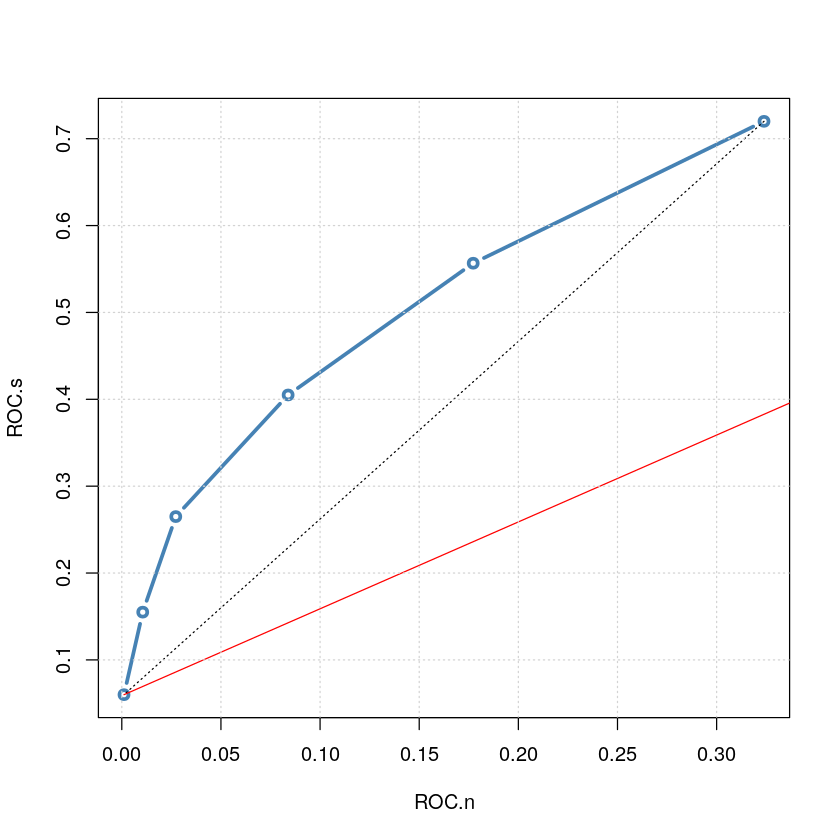

In [134]:
plot(ROC.n, ROC.s, type='b', lwd=3, col='steelblue')
lines(c(ROC.n[6], ROC.n[1]), c(ROC.s[6], ROC.s[1]), lty=3)
#Recta con pendiente 1
lines(c(ROC.n[1]+3, ROC.n[1]), c(ROC.s[1]+3, ROC.s[1]), col="red")
grid()

In [47]:
resultados

,S0R1,S0R0,S1R1,S1R0
condA,264,36,294,6
condB,168,132,273,27
condC,102,198,252,48
condD,30,270,198,102
condE,17,283,171,129
condF,2,298,108,192


In [71]:
zfROC <- rep(NA, 6)
zhROC <- rep(NA, 6)
nRes <- nrow(resultados)

for(cond in nRes:1){
    totalS0 <- sum(resultados[cond, c('S0R1','S0R0')])
    totalS1 <- sum(resultados[cond, c('S1R1','S1R0')])
    #ROC.n[i] <- sum(tasas['fa', 6:i])
    f <- resultados[cond, 'S0R1'] / 300
    h <- resultados[cond, 'S1R1'] / 300
    print(h)
    zfROC[nRes-cond+1] <- invcdf(normal(), f)
    zhROC[nRes-cond+1] <- invcdf(normal(), h)
  
    #ROC.s[i] <- sum(tasas['hit', 6:i])
    #zROC.s[nRes-cond+1] <- sum(resultados[nRes:cond, 'S1R1']) / total
}

zfROC
zhROC

[1] 0.36
[1] 0.57
[1] 0.66
[1] 0.84
[1] 0.91
[1] 0.98


[1] -2.4747396 -1.5833868 -1.2815516 -0.4124631  0.1509692  1.1749868

[1] -0.3584588  0.1763742  0.4124631  0.9944579  1.3407550  2.0537489

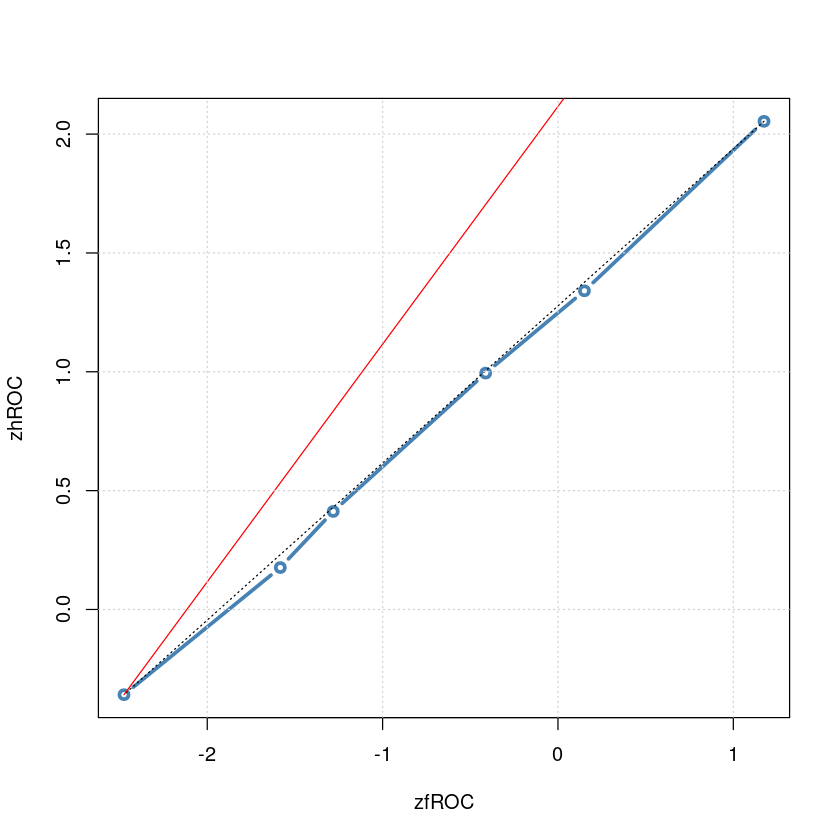

In [66]:
plot(zfROC, zhROC, type='b', lwd=3, col='steelblue')
lines(c(zfROC[6], zfROC[1]), c(zhROC[6], zhROC[1]), lty=3)
#Recta con pendiente 1
lines(c(zfROC[1]+3, zfROC[1]), c(zhROC[1]+3, zhROC[1]), col="red")
grid()

In [117]:
# c)
pred <- lm(zhROC~zfROC)
names(pred$coefficients) <- c('ordenada', 'pendiente')
pred


Call:
lm(formula = zhROC ~ zfROC)

Coefficients:
 ordenada  pendiente  
   1.2592     0.6633  


In [121]:
# z_h = z_f/ss + deltamu/ss
pendiente <- pred$coefficients['pendiente']
pendiente

pendiente 
0.6632685

In [122]:
#Pendiente = 1/ss
ss <- 1/pendiente
names(ss) <- 'sigma'
ss

sigma 
1.507685

In [ ]:
# z_h = z_f/ss + deltamu/ss

ss <- zf/zh + deltamu/zh

In [100]:
ss <- zfROC/zhROC + dps/zfROC

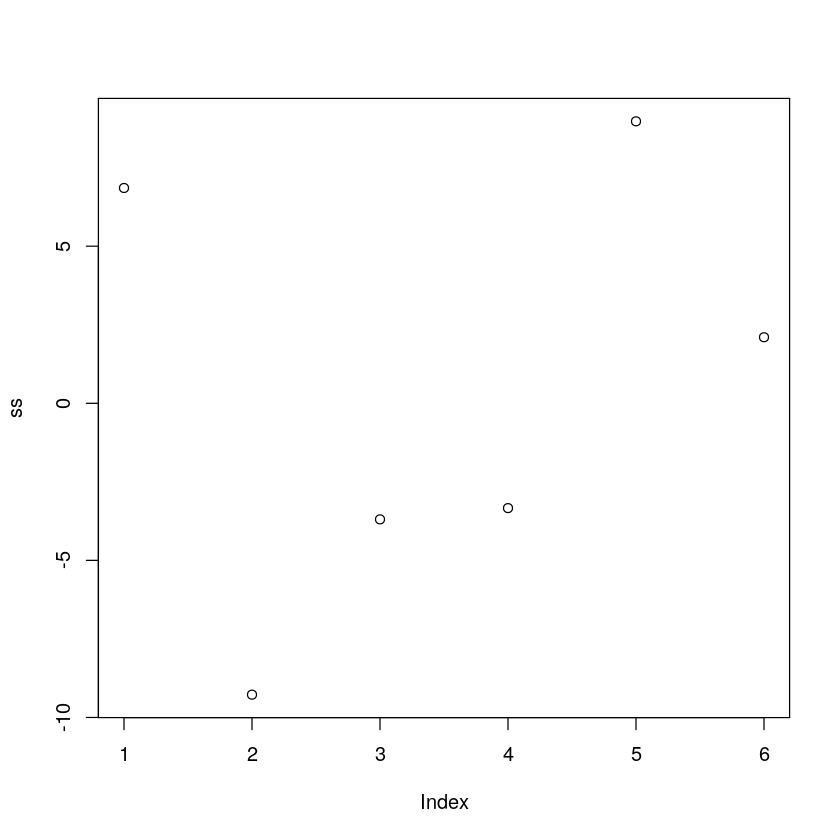

In [101]:
plot(ss)